In [1]:
import numpy as np
import pandas as pd
import random
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
a = 0
b = np.pi/4
L, R = 0, 1
def fi(x): 
    return np.tan(x)
def X():
    return a + (b-a) * rand()
def Y(x):
    return fi(x)

## Lab 1

In [3]:
n = 10
def make_samples(n):
    x_sample = np.array([X() for i in range(n)])
    y_sample = Y(x_sample)
    y_sample.sort()
    return x_sample, y_sample

### params of continious uniform distribution X

In [4]:
def uniform_mean(a, b):
    return (a + b) / 2

def uniform_std(a, b):
    return (b - a)**2 / 12

def M_uni():
    return uniform_mean(a, b)

def D_uni():
    return uniform_std(a, b)

x_mean = M_uni()
x_std = D_uni()
print(f'theoretical mean of X: {round(x_mean, 4)}')
print(f'theoretical std of X: {round(x_std, 4)}')

theoretical mean of X: 0.3927
theoretical std of X: 0.0514


### theoretical distribution function, density function

In [5]:
a_Y = Y(a)
b_Y = Y(b)
print(f'New interval: {(a_Y, b_Y)}')


def F(y):
    if y < a_Y: return 0
    if a_Y <= y < b_Y: return 4 / np.pi * np.arctan(y)
    if y > b_Y: return 1

    
def f(y):
    if a_Y < y < b_Y: return 4 / (np.pi * (1 + y**2))
    return 0

New interval: (0.0, 0.9999999999999999)


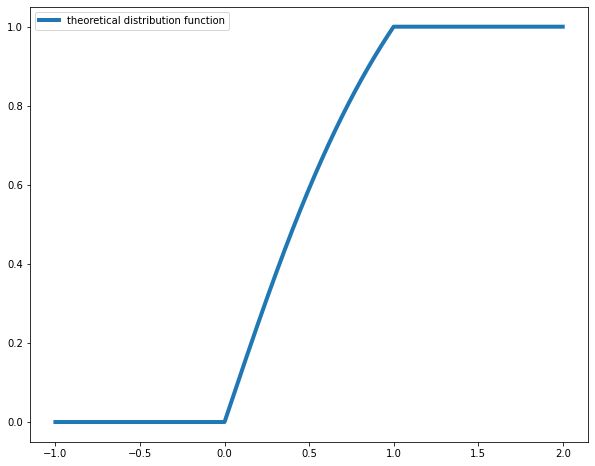

In [6]:
dots_count = 10**3
x_dots = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots = [F(x) for x in x_dots]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
plt.legend();

### imperical distribution function

#### get sample

In [7]:
sample = make_samples(n)[1]

In [8]:
def generate_samples(n, sample):
    n = len(sample)
    sample = list(sample)
    y_sample = [-1, sample[0]] + sample + [1, 2]
    emperic = [0, 0] + list([(i)/n for i in range(n)]) + [1, 1]
    return y_sample, emperic

generated = generate_samples(n, sample)

print(f'imperical mean = {np.mean(generated[0])}')
print(f'imperical std = {np.std(generated[0])}')

def update(N=n):
    global generated, sample
    sample = make_samples(n)[1]
    generated = generate_samples(N, sample)

imperical mean = 0.42296563332085907
imperical std = 0.6614473477535272


In [9]:
data = pd.DataFrame(data={'x':generated[0], 'y':generated[1]})
data.head()

,x,y
0,-1.000000,0.0
1,0.005933,0.0
2,0.005933,0.0
3,0.045326,0.1
4,0.081735,0.2


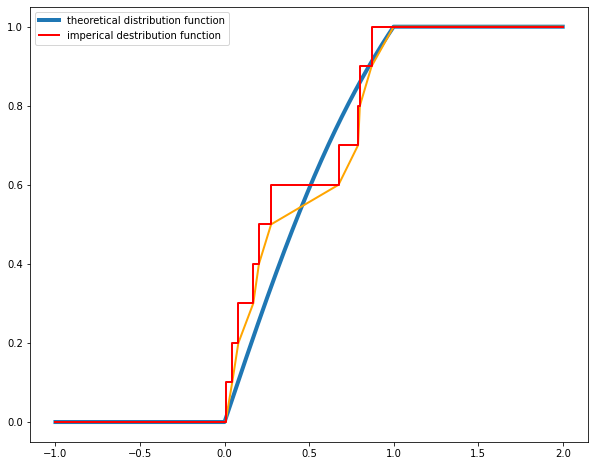

In [10]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
plt.plot(generated[0], generated[1], linewidth=2, color='orange')
plt.step(generated[0], generated[1], linewidth=2, color='red', label='imperical destribution function')
plt.legend();

## Lab 2

## building histograms

In [11]:
def build_histogram(sample, equidistand=True, bins=None):
    k = bins
    n = len(sample)
    M = None
    if k is None:
        if n <= 100:
            k = int(np.sqrt(n))
        else:
            k = 1 + int(3.322 * np.log10(n))

    hist = pd.DataFrame(columns=['Ai', 'Bi', 'v', 'hi', 'fi', 'mid', 'nums'])
    x_1, x_n = sample[0] - 0.00001, sample[-1] + 0.00001
    h = (x_n - x_1) / k

    def get_new_A_equdist(i):
        return x_1 + (i - 1) * h

    def get_new_A_not_equdist(i, prev_segment):

        if i == 1:
            return x_1
        left_border, right_border = prev_segment, None
        segment = intervals / k
        if i == 2:
            left_border = 0
        right_border = left_border + segment
        diff_part = right_border - int(right_border)
        index_for_B = int(right_border)
        B = (sample[index_for_B + 1] - sample[index_for_B]) * diff_part + sample[index_for_B]

        return B, right_border

    if equidistand:


        iter = 0
        saved_for_next = 0
        for i in range(1, k + 1):
            A = get_new_A_equdist(i)
            B = get_new_A_equdist(i + 1)
            mid = (B + A) / 2

            v = saved_for_next  # frequency
            saved_for_next = 0
            nums = []
            while (iter < n) and (sample[iter] <= B):
                nums.append(sample[iter])
                if sample[iter] == B:
                    v += 0.5
                    saved_for_next += 0.5
                else:
                    v += 1
                iter += 1

            if iter == n-1:
                v += saved_for_next

            fi = v / (n * h)
            hist.loc[i] = [A, B, v, h, fi, mid, nums]
        
        
        hist.iloc[-1, 1] = 1
        return hist

    else:
        if k > n - 1:
            if n <= 100:
                k = int(np.sqrt(n))
            else:
                k = 1 + int(3.322 * np.log10(n))
        intervals = n-1
        segments = intervals / k
        prev_segment = None
        A, B = None, None
        iter = 0
        for i in range(1, k + 1):
            if i == 1:
                A = get_new_A_not_equdist(1, None)
            else:
                A = B
            if i == k:
                B = x_n
            else:
                B, prev_segment = get_new_A_not_equdist(i+1, prev_segment)

            h = B - A
            mid = (A + B) / 2
            v = 0
            nums = []
            while (iter < n) and (sample[iter] < B):
                nums.append(sample[iter])
                v += 1
                iter += 1

            fi = (v * (x_n-x_1)) / (n * h)
            hist.loc[i] = [A, B, v, h, fi, mid, nums]
        
        
        hist.iloc[-1, 1] = 1
        return hist

In [12]:
def draw_hist(hist_data):
    x = []
    y = []
    for i in range(1, hist_data.shape[0]+1):
        x.append(hist_data.loc[i, 'Ai'])
        y.append(0)
        x.append(hist_data.loc[i, 'Ai'])
        y.append(hist_data.loc[i, 'fi'])
        x.append(hist_data.loc[i, 'Bi'])
        y.append(hist_data.loc[i, 'fi'])
    x.append(hist_data.loc[hist_data.shape[0], 'Bi'])
    y.append(0)
    return x, y


def get_hist_points(hist_data):
    x, y = draw_hist(hist_data)
    return x, y

def get_polygon_points(hist_data):
    x = []
    y = []
    for i in range(1, hist_data.shape[0]+1):
        x.append(hist_data.loc[i, 'mid'])
        y.append(hist_data.loc[i, 'fi'])
    return x, y

## histogram and polygon draw functions

In [13]:
def draw_histogram_plot(x, y, label_hist='histogram'):
    plt.plot(x, y, label=label_hist)
    plt.show()
def draw_polygon_plot(x, y, label_poly='polygon'):
    plt.plot(x, y, label = label_poly)
    plt.show()

## Equal intervals histogram & polygon

In [14]:
hist_data_equal = build_histogram(sample)
hist_data_equal

,Ai,Bi,v,hi,fi,mid,nums
1,0.005923,0.293866,6,0.287943,2.083742,0.149895,"[0.005932913602875424, 0.04532560692170163, 0...."
2,0.293866,0.581810,0,0.287943,0.000000,0.437838,[]
3,0.581810,1.000000,4,0.287943,1.389162,0.725782,"[0.6741155952786171, 0.7895280125898034, 0.800..."


In [15]:
hist_data_equal.iloc[-1, 1]

1.0

### drawing equal intervals histogram and polygon

#### get points 

In [16]:
x_hist_equal, y_hist_equal = get_hist_points(hist_data_equal)
x_poly_equal, y_poly_equal = get_polygon_points(hist_data_equal)

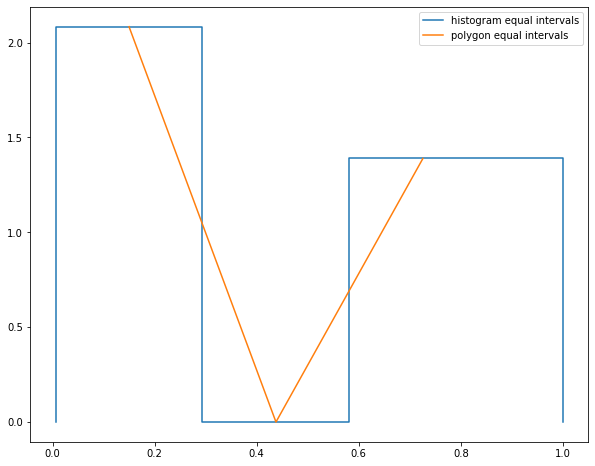

In [17]:
plt.plot(x_hist_equal, y_hist_equal, label='histogram equal intervals')
plt.plot(x_poly_equal, y_poly_equal, label ='polygon equal intervals')
plt.legend()

## Equal probabilities histogram & polygon

In [18]:
hist_data_prob = build_histogram(sample, equidistand=False)
x_hist_prob, y_hist_prob = get_hist_points(hist_data_prob)
x_poly_prob, y_poly_prob = get_polygon_points(hist_data_prob)

In [19]:
hist_data_prob

,Ai,Bi,v,hi,fi,mid,nums
1,0.005923,0.169903,3,0.163980,1.580370,0.087913,"[0.005932913602875424, 0.04532560692170163, 0...."
2,0.169903,0.674116,3,0.504213,0.513968,0.422009,"[0.16990294473602874, 0.20348341177554582, 0.2..."
3,0.674116,1.000000,4,0.195638,1.766184,0.771934,"[0.6741155952786171, 0.7895280125898034, 0.800..."


In [20]:
sample

array([0.00593291, 0.04532561, 0.08173483, 0.16990294, 0.20348341,
       0.27545583, 0.6741156 , 0.78952801, 0.8003635 , 0.86974331])

### drawing equal probability histogram and polygon

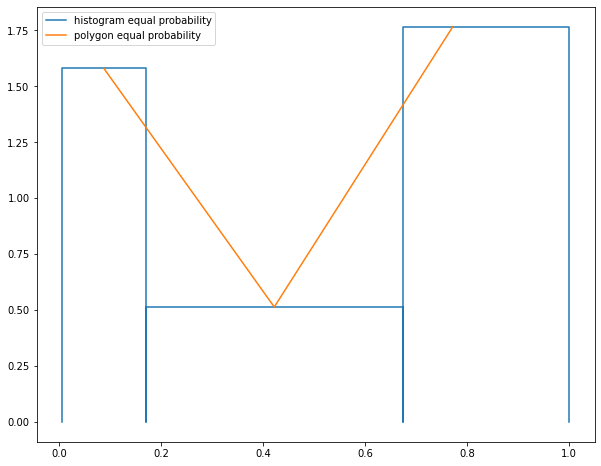

In [21]:
plt.plot(x_hist_prob, y_hist_prob, label='histogram equal probability')
plt.plot(x_poly_prob, y_poly_prob, label ='polygon equal probability')
plt.legend()

### comparing intervals and probability histograms

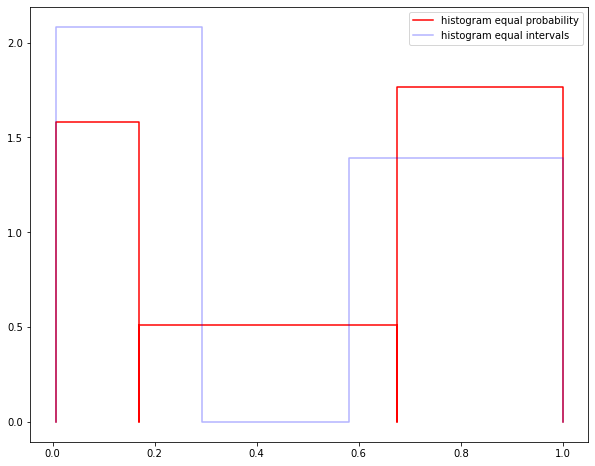

In [22]:
plt.plot(x_hist_prob, y_hist_prob, color='red', label='histogram equal probability')
# plt.plot(x_poly_prob, y_poly_prob, color='red', label ='polygon equal probability')
plt.plot(x_hist_equal, y_hist_equal, color='blue', label='histogram equal intervals', alpha=.3)
# plt.plot(x_poly_equal, y_poly_equal, color='blue', label ='polygon equal intervals', alpha=.3)

plt.legend()

## group data for distribution function intervals

In [23]:
def get_gropued_data(hist_data):
#     sample = list(hist_data['Ai']) + [hist_data.iloc[-1, 1]]
    sample = list(hist_data['Ai'])
#     n = len(sample)
    n = hist_data.shape[0]
    y_sample = [-1, sample[0]] + sample + [1, 2]
    emperic = [0, 0] + list([(i)/n for i in range(n)]) + [1, 1]
    return y_sample, emperic

In [24]:
grouped_data_equal = get_gropued_data(hist_data_equal)

In [25]:
grouped_data_equal

([-1,
  0.005922913602875424,
  0.005922913602875424,
  0.29386637771489726,
  0.5818098418269191,
  1,
  2],
 [0, 0, 0.0, 0.3333333333333333, 0.6666666666666666, 1, 1])

In [26]:
hist_data_equal

,Ai,Bi,v,hi,fi,mid,nums
1,0.005923,0.293866,6,0.287943,2.083742,0.149895,"[0.005932913602875424, 0.04532560692170163, 0...."
2,0.293866,0.581810,0,0.287943,0.000000,0.437838,[]
3,0.581810,1.000000,4,0.287943,1.389162,0.725782,"[0.6741155952786171, 0.7895280125898034, 0.800..."


In [27]:
grouped_df_equal = pd.DataFrame(data={'x':grouped_data_equal[0], 'y':grouped_data_equal[1]})
grouped_df_equal.head()

,x,y
0,-1.000000,0.000000
1,0.005923,0.000000
2,0.005923,0.000000
3,0.293866,0.333333
4,0.581810,0.666667


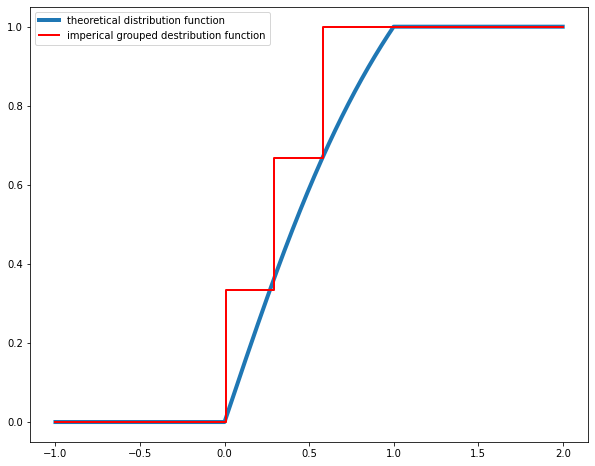

In [28]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
# plt.plot(grouped_data_equal[0], grouped_data_equal[1], linewidth=2, color='orange', label='smoothed grouped destribution function')
plt.step(grouped_data_equal[0], grouped_data_equal[1], linewidth=2, color='red', label='imperical grouped destribution function')
plt.legend();

## group data for distribution function probability

In [29]:
grouped_data_prob = get_gropued_data(hist_data_prob)

In [30]:
grouped_df_prob = pd.DataFrame(data={'x':grouped_data_prob[0], 'y':grouped_data_prob[1]})
grouped_df_prob.head()

,x,y
0,-1.000000,0.000000
1,0.005923,0.000000
2,0.005923,0.000000
3,0.169903,0.333333
4,0.674116,0.666667


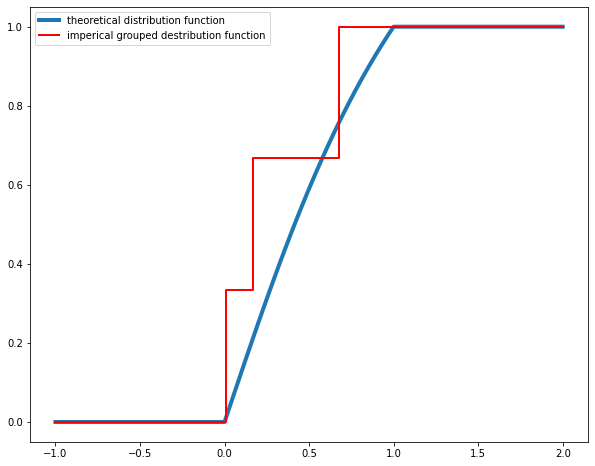

In [31]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
# plt.plot(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='orange', label='smoothed grouped destribution function')
plt.step(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='red', label='imperical grouped destribution function')
plt.legend();

### probabilty and intervals distribution functions

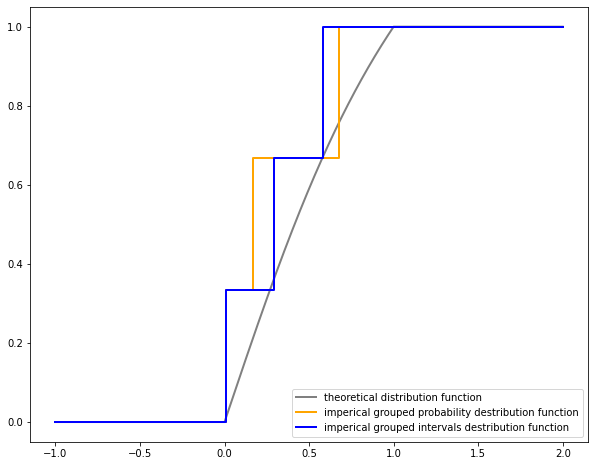

In [32]:
plt.plot(x_dots, y_dots, linewidth=2, color='gray', label='theoretical distribution function');
plt.step(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='orange', label='imperical grouped probability destribution function')
# plt.plot(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='orange', label='smoothed grouped destribution function')
plt.step(grouped_data_equal[0], grouped_data_equal[1], linewidth=2, color='blue', label='imperical grouped intervals destribution function')
# plt.plot(grouped_data_equal[0], grouped_data_equal[1], linewidth=2, color='blue', label='smoothed grouped destribution function')
plt.legend()

## Density function  

In [33]:
def get_plot_dens_data(sample_x, sample_y):
#     new_x = [a_Y] + sample_x + [b_Y]
    new_x = [a_Y] + [sample_x[0]-0.001] + sample_x + [sample_x[-1]+0.001] + [b_Y]
#     new_y = [0] + sample_y + [0]
    new_y = [0] + [sample_y[0]-0.001] + sample_y +  [sample_y[-1] + 0.001] + [0]
    return new_x, new_y
    return sample_x, sample_y

### Density funtcion for equal intervals

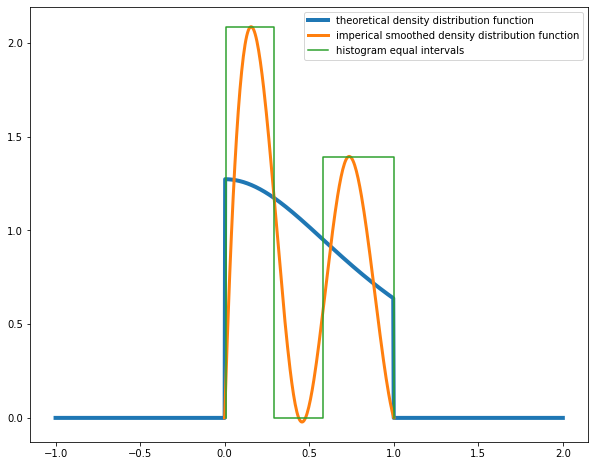

In [34]:
# theoretical
dots_count = 10**3
x_dots_dens = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots_dens = [f(x) for x in x_dots_dens]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots_dens, y_dots_dens, linewidth=4, label='theoretical density distribution function');


# imperical
x_dens_prepared, y_dens_prepared = get_plot_dens_data(x_poly_equal, y_poly_equal)
x_den, y_den = np.array(x_dens_prepared), np.array(y_dens_prepared)
x_den_new = np.linspace(x_den.min(), x_den.max(), 200)
spline = make_interp_spline(x_den, y_den, k=3)
y_den_smooth = spline(x_den_new)
plt.plot([a_Y-0.001] + list(x_den_new) + [b_Y+0.001],[0] + list(y_den_smooth) + [0], linewidth=3, label = 'imperical smoothed density distribution function')
# plt.plot(x_dens_prepared,y_dens_prepared, label='not smoothed')

plt.plot(x_hist_equal, y_hist_equal, label='histogram equal intervals')

plt.legend()


### Density funtcion for equal probabilities

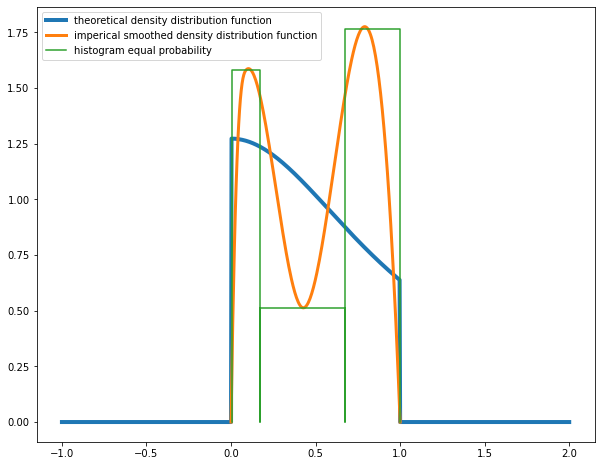

In [35]:
dots_count = 10**3
x_dots_dens = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots_dens = [f(x) for x in x_dots_dens]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots_dens, y_dots_dens, linewidth=4, label='theoretical density distribution function');

x_dens_prepared_prob, y_dens_prepared_prob = get_plot_dens_data(x_poly_prob, y_poly_prob)
x_den_prob, y_den_prob = np.array(x_dens_prepared_prob), np.array(y_dens_prepared_prob)
x_den_new_prob = np.linspace(x_den_prob.min(), x_den_prob.max(), 200)
spline_prob = make_interp_spline(x_den_prob, y_den_prob, k=3)
y_den_smooth_prob = spline_prob(x_den_new_prob)
plt.plot(list(x_den_new_prob),list(y_den_smooth_prob), linewidth=3, label = 'imperical smoothed density distribution function')


plt.plot(x_hist_prob, y_hist_prob, label='histogram equal probability')
# plt.plot(x_poly_prob, y_poly_prob, label ='polygon equal probability')

plt.legend();

# Lab 3

In [36]:
n_pearson = 200
n_kolm = 30
n_mises = 50

samp = make_samples(n_pearson)[1]
sample_pearson = samp
sample_kolm = samp
sample_mises = samp

## Pearson test

In [37]:
from scipy import stats

In [38]:
def get_chi2(hist_data):
    n = hist_data['v'].sum()
    hi_quad = 0
    for i in range(hist_data.shape[0]):
        p_emperic = hist_data.iloc[i, 2] / n
        A, B = hist_data.iloc[i, 0], hist_data.iloc[i, 1]
        p_theor = F(B) - F(A)
        hi_quad += n * (((p_emperic - p_theor)**2) / p_theor)
    return hi_quad


def check_pearson_hyp(sample, alpha):
    hist_data = build_histogram(sample, equidistand=False)
    df = hist_data.shape[0] - 1
    chi2 = get_chi2(hist_data)
    chi2_critic = stats.chi2.ppf(alpha, df)

    print(f'Pearson\'s chi-squared test with alpha={(1-alpha):.2} \
          \n\tchi2 = {chi2:.2f} \
          \n\tchi2_critical = {chi2_critic:.2f} |({(alpha, df)})\
          \n\tverdict: {chi2 < chi2_critic}')
    return hist_data, chi2, chi2_critic, df

In [39]:
n_pearson = 50
sample_p = sample_pearson

histogram_p, chi2, chi2_critic, df = check_pearson_hyp(sample_p, 0.001);

check_pearson_hyp(sample_p, 0.5);
check_pearson_hyp(sample_p, 0.7);
check_pearson_hyp(sample_p, 0.8);
check_pearson_hyp(sample_p, 0.9);
check_pearson_hyp(sample_p, 0.95);
check_pearson_hyp(sample_p, 0.99);
histogram_p

Pearson's chi-squared test with alpha=1.0           
	chi2 = 7.53           
	chi2_critical = 0.60 |((0.001, 7))          
	verdict: False
Pearson's chi-squared test with alpha=0.5           
	chi2 = 7.53           
	chi2_critical = 6.35 |((0.5, 7))          
	verdict: False
Pearson's chi-squared test with alpha=0.3           
	chi2 = 7.53           
	chi2_critical = 8.38 |((0.7, 7))          
	verdict: True
Pearson's chi-squared test with alpha=0.2           
	chi2 = 7.53           
	chi2_critical = 9.80 |((0.8, 7))          
	verdict: True
Pearson's chi-squared test with alpha=0.1           
	chi2 = 7.53           
	chi2_critical = 12.02 |((0.9, 7))          
	verdict: True
Pearson's chi-squared test with alpha=0.05           
	chi2 = 7.53           
	chi2_critical = 14.07 |((0.95, 7))          
	verdict: True
Pearson's chi-squared test with alpha=0.01           
	chi2 = 7.53           
	chi2_critical = 18.48 |((0.99, 7))          
	verdict: True


,Ai,Bi,v,hi,fi,mid,nums
1,0.002307,0.075352,25,0.073045,1.692763,0.038829,"[0.0023166662132266596, 0.0032720047417285863,..."
2,0.075352,0.167319,25,0.091967,1.344486,0.121336,"[0.07539908098061376, 0.0772658360683911, 0.08..."
3,0.167319,0.269848,25,0.102529,1.205985,0.218584,"[0.16755504422025586, 0.16967278254328644, 0.1..."
4,0.269848,0.388802,25,0.118954,1.039467,0.329325,"[0.2717969559194628, 0.28034999403695654, 0.28..."
5,0.388802,0.506319,25,0.117516,1.052182,0.447560,"[0.394770956315481, 0.396518633008546, 0.39987..."
6,0.506319,0.611642,25,0.105324,1.173986,0.558981,"[0.5086501658791711, 0.5086576215502059, 0.513..."
7,0.611642,0.745651,25,0.134009,0.922691,0.678647,"[0.6192781332982473, 0.6211130388621061, 0.624..."
8,0.745651,1.000000,25,0.245845,0.502955,0.868573,"[0.750291159578534, 0.7513036272102539, 0.7965..."


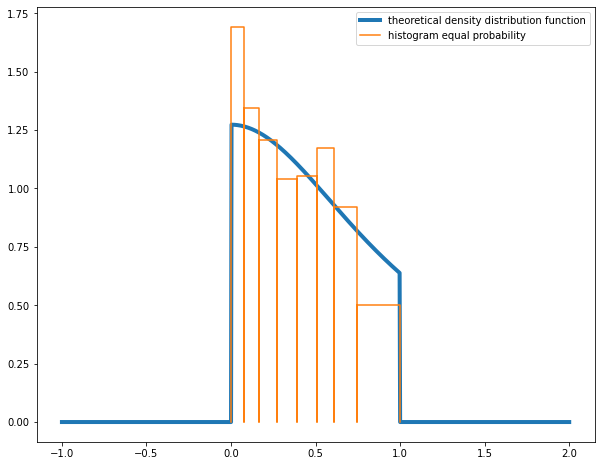

In [40]:
dots_count = 10**3
x_dots_dens = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots_dens = [f(x) for x in x_dots_dens]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots_dens, y_dots_dens, linewidth=4, label='theoretical density distribution function');


x_hist_prob, y_hist_prob = get_hist_points(histogram_p)
x_poly_prob, y_poly_prob = get_polygon_points(histogram_p)
x_dens_prepared_prob, y_dens_prepared_prob = get_plot_dens_data(x_poly_prob, y_poly_prob)
x_den_prob, y_den_prob = np.array(x_dens_prepared_prob), np.array(y_dens_prepared_prob)
x_den_new_prob = np.linspace(x_den_prob.min(), x_den_prob.max(), 200)
spline_prob = make_interp_spline(x_den_prob, y_den_prob, k=3)
y_den_smooth_prob = spline_prob(x_den_new_prob)
# plt.plot(list(x_den_new_prob),list(y_den_smooth_prob), linewidth=3, label = 'imperical smoothed density distribution function')


plt.plot(x_hist_prob, y_hist_prob, label='histogram equal probability')
# plt.plot(x_poly_prob, y_poly_prob, label ='polygon equal probability')

plt.legend();

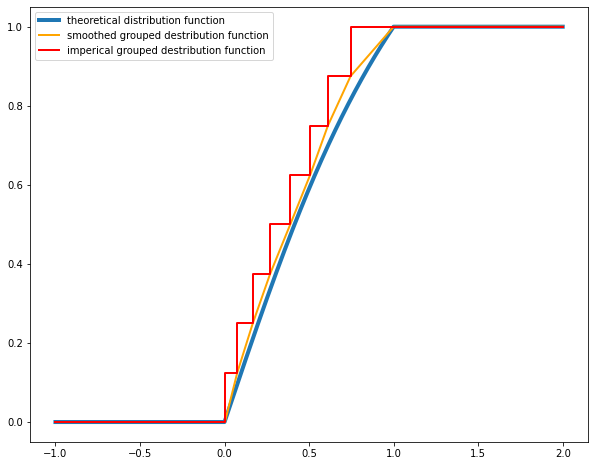

In [41]:
grouped_data_prob = get_gropued_data(histogram_p)
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
plt.plot(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='orange', label='smoothed grouped destribution function')
plt.step(grouped_data_prob[0], grouped_data_prob[1], linewidth=2, color='red', label='imperical grouped destribution function')
plt.legend();
grouped_df_prob = pd.DataFrame(data={'x':grouped_data_prob[0], 'y':grouped_data_prob[1]})

In [42]:
chi2_critic = stats.chi2.ppf(0.99, 4)
chi2_critic

13.276704135987622

## Kolmogorov test

In [43]:
def get_kolmogorov_value(sample):
    n = len(sample)
    emperic_F = [i/n for i in range(n)]
    d = 0
    max_delta_x = 0
    for i in range(n):
#         d = max(d, abs(emperic_F[i], F(sample[i])))
        saved_d = d
        d = max(d, max(abs(i/n - F(sample[i])), abs((i+1)/n - F(sample[i]))))
        if saved_d != d:
            max_delta_x = sample[i], (i/n + (i+1)/n) / 2
    K = d * np.sqrt(n) + 1/(6*np.sqrt(n))
    return K, max_delta_x


def check_kolmogorov_hyp(sample, alpha):
    K, max_delta_x = get_kolmogorov_value(sample)
    K_critical = stats.kstwobign.ppf(alpha)
    print(f'Kolmogorov test with alpha = {(1-alpha):.2f}\n\t\
            K = {K:.4f}\n\t\
            K_critical = {K_critical:.4f} | {alpha}\n\t\
            verdict: {K < K_critical}')
    return max_delta_x

In [44]:
n_kolm = 30
sample_k = sample_kolm

max_delta_x = check_kolmogorov_hyp(sample_k, 0.5);
check_kolmogorov_hyp(sample_k, 0.6);
check_kolmogorov_hyp(sample_k, 0.7);
check_kolmogorov_hyp(sample_k, 0.8);
check_kolmogorov_hyp(sample_k, 0.9);
check_kolmogorov_hyp(sample_k, 0.95);
check_kolmogorov_hyp(sample_k, 0.99);

Kolmogorov test with alpha = 0.50
	            K = 0.9931
	            K_critical = 0.8276 | 0.5
	            verdict: False
Kolmogorov test with alpha = 0.40
	            K = 0.9931
	            K_critical = 0.8948 | 0.6
	            verdict: False
Kolmogorov test with alpha = 0.30
	            K = 0.9931
	            K_critical = 0.9731 | 0.7
	            verdict: False
Kolmogorov test with alpha = 0.20
	            K = 0.9931
	            K_critical = 1.0727 | 0.8
	            verdict: True
Kolmogorov test with alpha = 0.10
	            K = 0.9931
	            K_critical = 1.2238 | 0.9
	            verdict: True
Kolmogorov test with alpha = 0.05
	            K = 0.9931
	            K_critical = 1.3581 | 0.95
	            verdict: True
Kolmogorov test with alpha = 0.01
	            K = 0.9931
	            K_critical = 1.6276 | 0.99
	            verdict: True


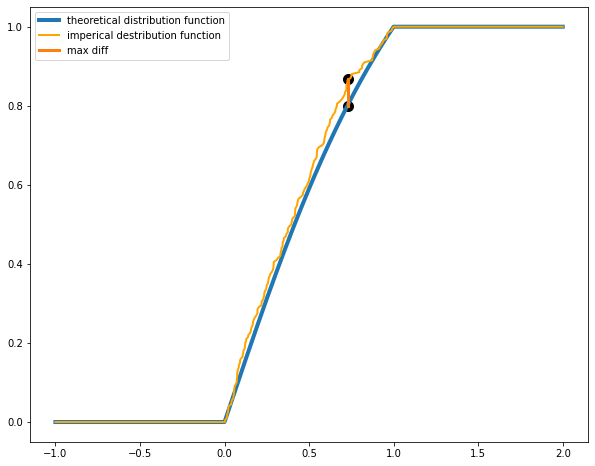

In [45]:
kolm_data = generate_samples(n_kolm, sample_k)


plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
plt.plot(kolm_data[0], kolm_data[1], linewidth=2, color='orange',  label='imperical destribution function')
# plt.step(kolm_data[0], kolm_data[1], linewidth=2, color='red', label='imperical destribution function')
plt.scatter(max_delta_x[0], max_delta_x[1], s=100, color='black')
plt.scatter(max_delta_x[0], F(max_delta_x[0]), s=100, color='black')
plt.plot([max_delta_x[0], max_delta_x[0]], [max_delta_x[1], F(max_delta_x[0])], linewidth=3, label='max diff')
plt.legend();


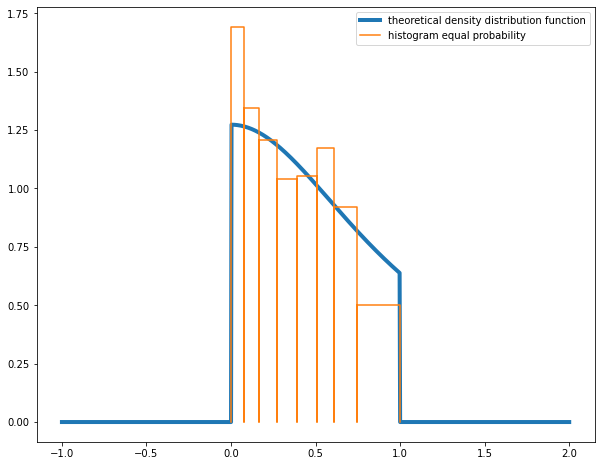

In [46]:
hist_k = build_histogram(sample_k, equidistand=False)


dots_count = 10**3
x_dots_dens = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots_dens = [f(x) for x in x_dots_dens]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots_dens, y_dots_dens, linewidth=4, label='theoretical density distribution function');


x_hist_prob, y_hist_prob = get_hist_points(hist_k)
x_poly_prob, y_poly_prob = get_polygon_points(hist_k)
x_dens_prepared_prob, y_dens_prepared_prob = get_plot_dens_data(x_poly_prob, y_poly_prob)
x_den_prob, y_den_prob = np.array(x_dens_prepared_prob), np.array(y_dens_prepared_prob)
x_den_new_prob = np.linspace(x_den_prob.min(), x_den_prob.max(), 200)
spline_prob = make_interp_spline(x_den_prob, y_den_prob, k=3)
y_den_smooth_prob = spline_prob(x_den_new_prob)
# plt.plot(list(x_den_new_prob),list(y_den_smooth_prob), linewidth=3, label = 'imperical smoothed density distribution function')


plt.plot(x_hist_prob, y_hist_prob, label='histogram equal probability')
# plt.plot(x_poly_prob, y_poly_prob, label ='polygon equal probability')

plt.legend();

## Mises criterion

In [47]:
def get_mises_value(sample):
    n = len(sample)
    w = 1 / (12 * n)
    for i in range(0, n):
        w += (F(sample[i]) - ((i - 0.5) / n)) ** 2
        
    return w

def get_mises_critic(alpha):
    if alpha == 0.9:
        return 0.3473
    if alpha == 0.95:
        return 0.4614
    if alpha == 0.99:
        return 0.7435
    raise ValueError("not such alpha in table")
    
def check_mises_hyp(sample, alpha):
    w = get_mises_value(sample)
    w_critical = get_mises_critic(alpha)
    print(f'Mises test with alpha = {(1-alpha):.2f}\n\t\
            w = {w:.4f}\n\t\
            w_critical = {w_critical:.4f} | {alpha}\n\t\
            verdict: {w < w_critical}')

In [48]:
n_mises = 50
sample_mises = sample_mises


check_mises_hyp(sample_mises, 0.9)
check_mises_hyp(sample_mises, 0.95)
check_mises_hyp(sample_mises, 0.99)


Mises test with alpha = 0.10
	            w = 0.1941
	            w_critical = 0.3473 | 0.9
	            verdict: True
Mises test with alpha = 0.05
	            w = 0.1941
	            w_critical = 0.4614 | 0.95
	            verdict: True
Mises test with alpha = 0.01
	            w = 0.1941
	            w_critical = 0.7435 | 0.99
	            verdict: True


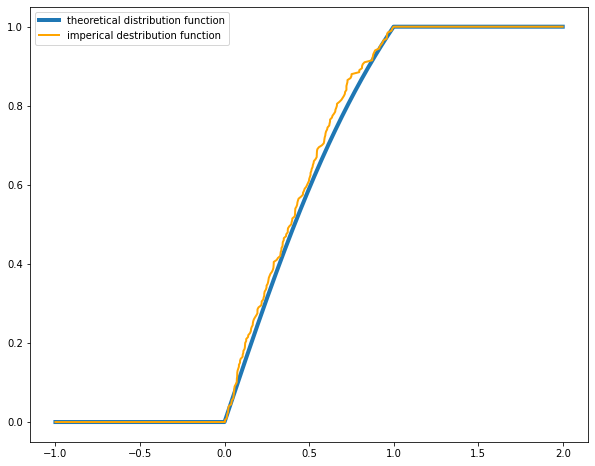

In [49]:
mises_data = generate_samples(n_mises, sample_mises)


plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots, y_dots, linewidth=4, label='theoretical distribution function');
plt.plot(mises_data[0], mises_data[1], linewidth=2, color='orange',  label='imperical destribution function')
# plt.step(kolm_data[0], kolm_data[1], linewidth=2, color='red', label='imperical destribution function')


plt.legend();

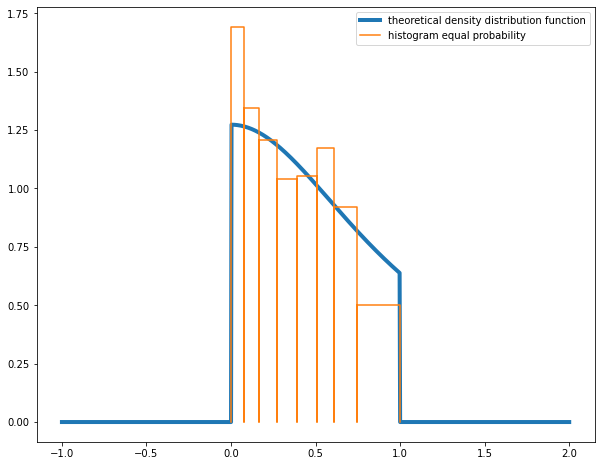

In [50]:
hist_mises = build_histogram(sample_mises, equidistand=False)


dots_count = 10**3
x_dots_dens = np.linspace(a_Y-1, b_Y+1, dots_count)
y_dots_dens = [f(x) for x in x_dots_dens]
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(x_dots_dens, y_dots_dens, linewidth=4, label='theoretical density distribution function');


x_hist_prob, y_hist_prob = get_hist_points(hist_mises)
x_poly_prob, y_poly_prob = get_polygon_points(hist_mises)
x_dens_prepared_prob, y_dens_prepared_prob = get_plot_dens_data(x_poly_prob, y_poly_prob)
x_den_prob, y_den_prob = np.array(x_dens_prepared_prob), np.array(y_dens_prepared_prob)
x_den_new_prob = np.linspace(x_den_prob.min(), x_den_prob.max(), 200)
spline_prob = make_interp_spline(x_den_prob, y_den_prob, k=3)
y_den_smooth_prob = spline_prob(x_den_new_prob)
# plt.plot(list(x_den_new_prob),list(y_den_smooth_prob), linewidth=3, label = 'imperical smoothed density distribution function')


plt.plot(x_hist_prob, y_hist_prob, label='histogram equal probability')
# plt.plot(x_poly_prob, y_poly_prob, label ='polygon equal probability')

plt.legend();

# LAB 4

## mean and std

In [51]:
def M():
    return -4/np.pi * np.log(1/np.sqrt(2)) 

def D():
    return (4/np.pi * (np.tan(np.pi/4) - 0 - np.pi/4)) - M() ** 2
def std():
    return D() ** 1/2

In [52]:
M(), D()

(0.44127120030530337, 0.07851927251627944)

In [53]:
def find_mean(sample):
    n = len(sample)
    m = 0
    for i in range(n):
        m += sample[i]
    m = m / n
    return m

def find_std(sample):
    n = len(sample)
    m = find_mean(sample)
    std = 0
    for i in range(n):
        std += (sample[i] - m) ** 2
    std = std / (n-1)
    std = np.sqrt(std)
    return std

In [54]:
def get_student_val(alpha, df):
    return stats.t.ppf(alpha, df)

def get_chi_val(alpha, df):
    return stats.chi2.ppf(alpha, df)

def get_laplace_value(x):
    return stats.norm.cdf(x)


def find_laplace_value(value):
    value += 1/2
    L, R = 0, 10
    while True:
        x = (L+R)/2
        laplace = get_laplace_value(x)
        if abs(laplace - value) < 10**-6: return x
        elif laplace < value: L = x
        elif laplace > value: R = x

In [55]:
def confidence_interval_mean(sample, alpha, std_=None):
    n = len(sample)
    mean = find_mean(sample)
    if std_ is None:
        std = find_std(sample)
        delta = get_student_val(1-(1-alpha)/2, n-1) * std / n**1/2
    else:
        std = std_
        delta = find_laplace_value(alpha/2) * std / n**1/2
    return (mean-delta, mean+delta)

def confidence_interval_std(sample, alpha, mean_=None):
    n = len(sample)
    if mean_ is None:
        std = find_std(sample)
        delta_l = (n-2) * std / get_chi_val((1+alpha)/2, n-1)
        delta_r = (n-2) * std / get_chi_val((1-alpha)/2, n-1)
    else:
        mean = mean_
        std = sum((x - mean) ** 2 for x in sample) / n
        delta_l = n * std / get_chi_val((1+alpha)/2, n)
        delta_r = n * std / get_chi_val((1-alpha)/2, n)
    return (delta_l, delta_r)

        

## Calculating mean

In [56]:
def calc_mean_confident(sample):
    n = len(sample)
    dot_mean = find_mean(sample)
    dot_std = find_std(sample)
    dot_D = dot_std ** 2
    print(f'Point mean: {dot_mean:.3f}')
    
    print(f'Point D: {dot_D}:.3f')
    print(f'Theoretical D: {D():.3f}')
    
    print(f'\nTheoretic mean: {M():.3f}\n')
    
    alphas = [0.9, 0.95, 0.99, 0.999]
    
    print('\tCalculating mean and don\'t know D:')
    for alpha in alphas:
        interval = confidence_interval_mean(sample, alpha)
        print(f'alpha= {alpha}: [{interval[0]:.3f}, {interval[1]:.3f}]')
        print(f'Theoretic mean in interval? -> {M() > interval[0] and M() < interval[1]}')
        
    
    print('\n\n\tCalculating mean and know D:')
    for alpha in alphas:
        interval = confidence_interval_mean(sample, alpha, D())
        print(f'alpha= {alpha}: [{interval[0]:.3f}, {interval[1]:.3f}]')
        print(f'Theoretic mean in interval? -> {M() > interval[0] and M() < interval[1]}')

In [57]:
n_sample = 100
sample = make_samples(n_sample)[1]
calc_mean_confident(sample)

Point mean: 0.415
Point D: 0.08202681291279201:.3f
Theoretical D: 0.079

Theoretic mean: 0.441

	Calculating mean and don't know D:
alpha= 0.9: [0.413, 0.418]
Theoretic mean in interval? -> False
alpha= 0.95: [0.412, 0.418]
Theoretic mean in interval? -> False
alpha= 0.99: [0.411, 0.419]
Theoretic mean in interval? -> False
alpha= 0.999: [0.410, 0.420]
Theoretic mean in interval? -> False


	Calculating mean and know D:
alpha= 0.9: [0.415, 0.416]
Theoretic mean in interval? -> False
alpha= 0.95: [0.414, 0.416]
Theoretic mean in interval? -> False
alpha= 0.99: [0.414, 0.416]
Theoretic mean in interval? -> False
alpha= 0.999: [0.414, 0.416]
Theoretic mean in interval? -> False


In [58]:
def get_X_Y(sample, std_=None):
    alphas = np.linspace(0.5, 1.0, 50)
    intervals = [confidence_interval_mean(sample, alpha, std_=std_) for alpha in alphas]
    lengths = [np.abs(interval[0] - interval[1]) for interval in intervals]
    return alphas, lengths

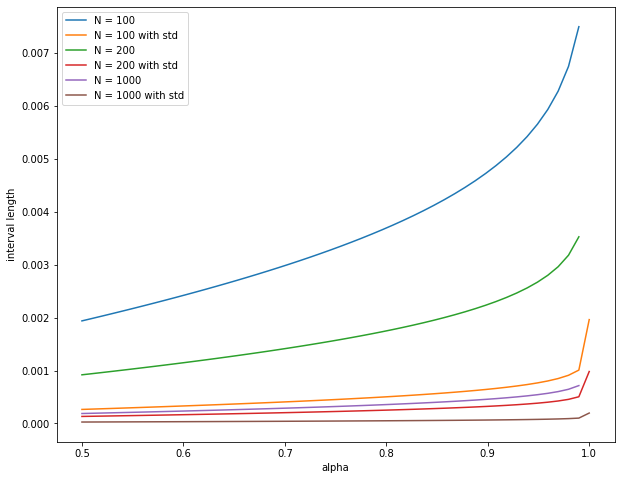

In [59]:
X_alph, Y_len = get_X_Y(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')

X_alph, Y_len = get_X_Y(sample, std_=std())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with std')

sample = make_samples(200)[1]
X_alph, Y_len = get_X_Y(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')
X_alph, Y_len = get_X_Y(sample, std_=std())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with std')



sample = make_samples(1000)[1]
X_alph, Y_len = get_X_Y(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')
X_alph, Y_len = get_X_Y(sample, std_=std())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with std')
plt.xlabel('alpha')
plt.ylabel('interval length')

plt.legend()

In [60]:
def get_length_from_n_mean(alpha=0.99, std=None):
    length_arr = []
    N_arr = [i for i in range(30, 100)]
    
    for i in N_arr:
        sample = make_samples(i)[1] 
        interval = confidence_interval_mean(sample, alpha)
        length_arr.append(abs(interval[1] - interval[0]))
    
    return N_arr, length_arr

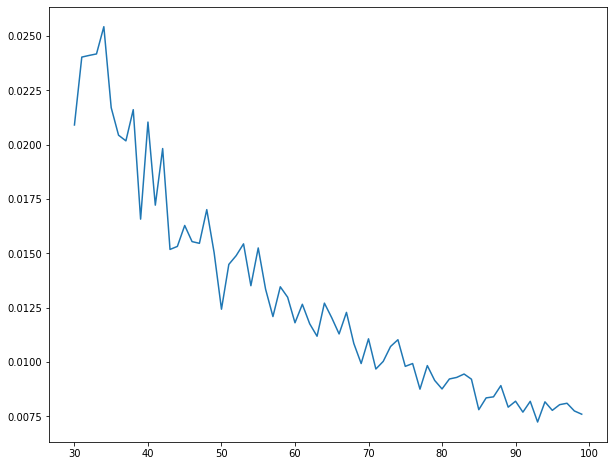

In [61]:
X_arr_mean, Y_length_arr = get_length_from_n_mean()
plt.plot(X_arr_mean, Y_length_arr)

## Calculating std

In [62]:
def calc_std_confident(sample):
    n = len(sample)
    dot_mean = find_mean(sample)
    dot_std = find_std(sample)
    dot_D = dot_std ** 2
    print(f'Point mean: {dot_mean:.3f}')
    
    print(f'Point D: {dot_D}:.3f')
    print(f'\nTheoretic mean: {M():.3f}\n')
    
    print(f'Theoretical D: {D():.3f}')
    
    alphas = [0.9, 0.95, 0.99, 0.999]
    
    print('\tCalculating std and don\'t know M:')
    for alpha in alphas:
        interval = confidence_interval_std(sample, alpha)
        print(f'alpha= {alpha}: [{interval[0]:.3f}, {interval[1]:.3f}]')
        print(f'Theoretic std in interval? -> {D() > interval[0] and D() < interval[1]}')
        
    
    print('\n\n\tCalculating std and know M:')
    for alpha in alphas:
        interval = confidence_interval_std(sample, alpha, M())
        print(f'alpha= {alpha}: [{interval[0]:.3f}, {interval[1]:.3f}]')
        print(f'Theoretic std in interval? -> {D() > interval[0] and D() < interval[1]}')

In [63]:
sample = make_samples(30)[1]
calc_std_confident(sample)

Point mean: 0.365
Point D: 0.07253656014999207:.3f

Theoretic mean: 0.441

Theoretical D: 0.079
	Calculating std and don't know M:
alpha= 0.9: [0.177, 0.426]
Theoretic std in interval? -> False
alpha= 0.95: [0.165, 0.470]
Theoretic std in interval? -> False
alpha= 0.99: [0.144, 0.575]
Theoretic std in interval? -> False
alpha= 0.999: [0.124, 0.737]
Theoretic std in interval? -> False


	Calculating std and know M:
alpha= 0.9: [0.052, 0.123]
Theoretic std in interval? -> True
alpha= 0.95: [0.049, 0.136]
Theoretic std in interval? -> True
alpha= 0.99: [0.042, 0.165]
Theoretic std in interval? -> True
alpha= 0.999: [0.037, 0.211]
Theoretic std in interval? -> True


In [64]:
def get_X_Y_std(sample, mean_=None):
    alphas = np.linspace(0.5, 1.0, 50)
    intervals = [confidence_interval_std(sample, alpha, mean_=mean_) for alpha in alphas]
    lengths = [np.abs(interval[0] - interval[1]) for interval in intervals]
    return alphas, lengths

<ipython-input-55-6bd08d8e4f48>:17: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = (n-2) * std / get_chi_val((1-alpha)/2, n-1)
<ipython-input-55-6bd08d8e4f48>:22: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = n * std / get_chi_val((1-alpha)/2, n)
<ipython-input-55-6bd08d8e4f48>:17: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = (n-2) * std / get_chi_val((1-alpha)/2, n-1)
<ipython-input-55-6bd08d8e4f48>:22: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = n * std / get_chi_val((1-alpha)/2, n)
<ipython-input-55-6bd08d8e4f48>:17: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = (n-2) * std / get_chi_val((1-alpha)/2, n-1)
<ipython-input-55-6bd08d8e4f48>:22: RuntimeWarning: divide by zero encountered in double_scalars
  delta_r = n * std / get_chi_val((1-alpha)/2, n)


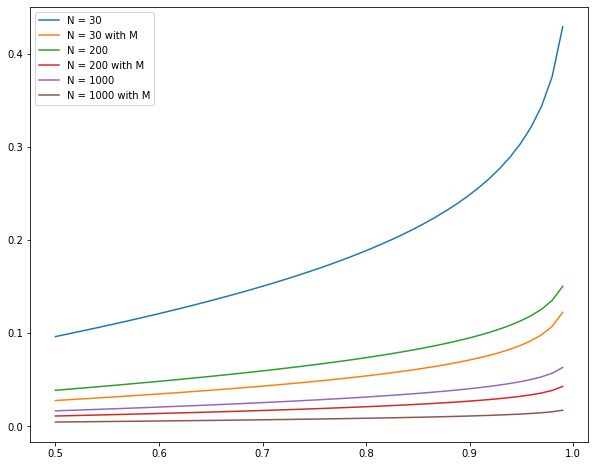

In [65]:
X_alph, Y_len = get_X_Y_std(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')

X_alph, Y_len = get_X_Y_std(sample, mean_=M())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with M')

sample = make_samples(200)[1]
X_alph, Y_len = get_X_Y_std(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')
X_alph, Y_len = get_X_Y_std(sample, mean_=M())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with M')



sample = make_samples(1000)[1]
X_alph, Y_len = get_X_Y_std(sample)
plt.plot(X_alph, Y_len, label=f'N = {len(sample)}')
X_alph, Y_len = get_X_Y_std(sample, mean_=M())
plt.plot(X_alph, Y_len, label=f'N = {len(sample)} with M')

plt.legend()

In [66]:
def get_length_from_n_std(alpha=0.99, mean=None):
    length_arr = []
    N_arr = [i for i in range(30, 100)]
    
    for i in N_arr:
        sample = make_samples(i)[1] 
        interval = confidence_interval_std(sample, alpha, mean_=mean)
        length_arr.append(abs(interval[1] - interval[0]))
    
    return N_arr, length_arr

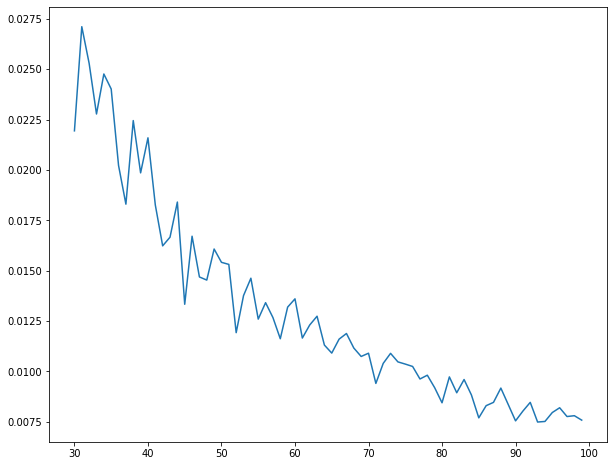

In [67]:
X_arr_mean, Y_length_arr = get_length_from_n_mean()
plt.plot(X_arr_mean, Y_length_arr)